In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
data['Species'].replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],value=[0,1,2],inplace=True)

C:\Users\seasp\AppData\Local\Temp\ipykernel_6780\796638755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Species'].replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],value=[0,1,2],inplace=True)
C:\Users\seasp\AppData\Local\Temp\ipykernel_6780\796638755.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [70]:
np.unique(data['Species'])

array([0, 1, 2], dtype=int64)

In [71]:
X=data[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']].values
Y=data['Species'].values

In [72]:
print(Y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [73]:
model=GaussianNB()

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [75]:
model.fit(X_train,Y_train)

GaussianNB()

In [76]:
mapper={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [77]:
predictions=model.predict(X_test)

In [79]:
#predictions=[mapper[i] for i in predictions]

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
from sklearn.metrics import classification_report

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

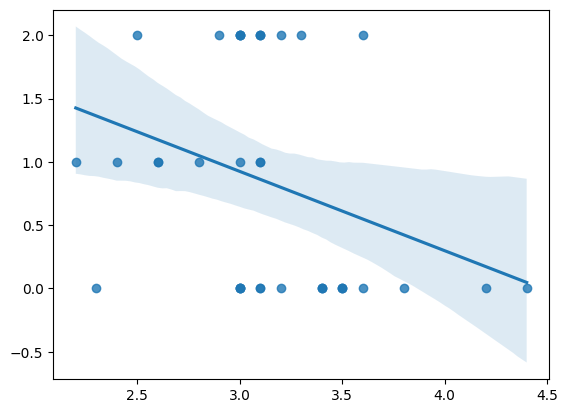

In [83]:
sns.regplot(x=X_test[:,1],y=predictions)


In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
from sklearn.metrics import classification_report

In [86]:
cm=confusion_matrix(Y_test,predictions)

In [91]:
print(cm)

[[18  0  0]
 [ 0  8  2]
 [ 0  0 10]]


In [93]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.96      0.95      0.95        38

